In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV


In [ ]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/train_nulls.csv')

In [ ]:
df_final

,timestamp,Temperature,Humidity,feels_like,temp_min,temp_max,pressure,wind_speed,wind_deg,rain,...,AOD_Uncertainty,Column_WV,Optical_Depth_047,Optical_Depth_055,month,unique_id_month,B2,B3,B4,avg_rad
0,2019-03-13 22,17.25,70.20,17.08,17.54,19.00,1017,1.91,353,0.0,...,NaN,NaN,NaN,NaN,2019-03,2019-03_28.5_77.2671,11474.5,10827.5,10445.000000,NaN
1,2019-03-13 23,16.62,74.80,17.41,15.60,18.00,1017,2.31,347,0.0,...,NaN,NaN,NaN,NaN,2019-03,2019-03_28.5_77.2671,11474.5,10827.5,10445.000000,NaN
2,2019-03-14 00,15.88,81.30,15.44,16.64,17.12,1017,2.56,354,0.0,...,NaN,NaN,NaN,NaN,2019-03,2019-03_28.5_77.2671,11474.5,10827.5,10445.000000,NaN
3,2019-03-14 01,15.12,84.35,14.43,15.55,16.26,1016,2.62,3,0.0,...,NaN,NaN,NaN,NaN,2019-03,2019-03_28.5_77.2671,11474.5,10827.5,10445.000000,NaN
4,2019-03-14 02,14.70,84.72,14.73,13.60,16.00,1016,2.67,8,0.0,...,NaN,NaN,NaN,NaN,2019-03,2019-03_28.5_77.2671,11474.5,10827.5,10445.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146038,2020-07-31 13,35.42,52.03,39.09,31.00,34.30,1002,1.00,60,0.0,...,NaN,NaN,NaN,NaN,2020-07,2020-07_28.7757_77.0516,12831.0,11839.0,10835.666667,14.99
146039,2020-07-31 14,36.42,49.95,39.39,31.00,34.20,1001,1.50,140,0.0,...,NaN,NaN,NaN,NaN,2020-07,2020-07_28.7757_77.0516,12831.0,11839.0,10835.666667,14.99
146040,2020-07-31 15,37.98,46.73,40.62,32.43,33.14,1000,1.00,70,0.0,...,NaN,NaN,NaN,NaN,2020-07,2020-07_28.7757_77.0516,12831.0,11839.0,10835.666667,14.99
146041,2020-07-31 16,36.42,50.62,40.79,32.84,34.00,1000,1.00,120,0.0,...,NaN,NaN,NaN,NaN,2020-07,2020-07_28.7757_77.0516,12831.0,11839.0,10835.666667,14.99


In [ ]:
df_final.columns

Index(['timestamp', 'Temperature', 'Humidity', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'wind_speed', 'wind_deg', 'rain', 'clouds_all',
       'weather', 'AQI', 'longitude', 'latitude', 'datetime',
       'unique_id_datetime', 'NO2_density', 'Unnamed: 0', 'cloud_fraction',
       'time', 'AOD_Uncertainty', 'Column_WV', 'Optical_Depth_047',
       'Optical_Depth_055', 'month', 'unique_id_month', 'B2', 'B3', 'B4',
       'avg_rad'],
      dtype='object')

In [ ]:
drop_col = ['timestamp',
       'unique_id_datetime', 'Unnamed: 0',  'time',  'unique_id_month']

In [ ]:
df_final.columns

Index(['timestamp', 'Temperature', 'Humidity', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'wind_speed', 'wind_deg', 'rain', 'clouds_all',
       'weather', 'AQI', 'longitude', 'latitude', 'datetime',
       'unique_id_datetime', 'NO2_density', 'Unnamed: 0', 'cloud_fraction',
       'time', 'AOD_Uncertainty', 'Column_WV', 'Optical_Depth_047',
       'Optical_Depth_055', 'month', 'unique_id_month', 'B2', 'B3', 'B4',
       'avg_rad'],
      dtype='object')

In [ ]:
# df_final[df_final['NO2'].isna()==True]
len(df_final)

146043

In [ ]:
# dff = df_final.dropna()
dff = df_final

In [ ]:
print(dff.columns)
len(dff)

Index(['timestamp', 'Temperature', 'Humidity', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'wind_speed', 'wind_deg', 'rain', 'clouds_all',
       'weather', 'AQI', 'longitude', 'latitude', 'datetime',
       'unique_id_datetime', 'NO2_density', 'Unnamed: 0', 'cloud_fraction',
       'time', 'AOD_Uncertainty', 'Column_WV', 'Optical_Depth_047',
       'Optical_Depth_055', 'month', 'unique_id_month', 'B2', 'B3', 'B4',
       'avg_rad'],
      dtype='object')


146043

In [ ]:
# df_final = df_final.fillna(0)

In [ ]:
y = dff[['AQI']]
X = dff[['Temperature', 'Humidity', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'wind_speed', 'wind_deg', 'rain', 'clouds_all', 'weather',
        'longitude', 'latitude', 'NO2_density',
       'cloud_fraction', 'AOD_Uncertainty', 'Column_WV', 'Optical_Depth_047',
       'Optical_Depth_055', 'B2', 'B3', 'B4', 'avg_rad']]

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
numeric_pipeline = Pipeline(
                    steps= [("impute", SimpleImputer(strategy="mean"))])

In [ ]:
from sklearn.compose import ColumnTransformer

num_cols = ['Temperature', 'Humidity', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'wind_speed', 'wind_deg', 'rain', 'clouds_all', 'weather',
        'longitude', 'latitude', 'NO2_density',
       'cloud_fraction', 'AOD_Uncertainty', 'Column_WV', 'Optical_Depth_047',
       'Optical_Depth_055', 'B2', 'B3', 'B4', 'avg_rad']

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols)
    ]
)

In [ ]:
X = full_processor.fit_transform(X)
print(X)

[[   17.25          70.2           17.08       ... 10827.5
  10445.            37.86122452]
 [   16.62          74.8           17.41       ... 10827.5
  10445.            37.86122452]
 [   15.88          81.3           15.44       ... 10827.5
  10445.            37.86122452]
 ...
 [   37.98          46.73          40.62       ... 11839.
  10835.66666667    14.98999977]
 [   36.42          50.62          40.79       ... 11839.
  10835.66666667    14.98999977]
 [   34.2           58.55          38.42       ... 11839.
  10835.66666667    14.98999977]]


In [ ]:

scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)
print(X)


[[-1.06779378  0.53225405 -1.14522073 ... -0.72894702 -0.75980213
   0.        ]
 [-1.14030163  0.73352971 -1.11166305 ... -0.72894702 -0.75980213
   0.        ]
 [-1.22546958  1.01794097 -1.31199228 ... -0.72894702 -0.75980213
   0.        ]
 ...
 [ 1.31805971 -0.49468936  1.24856113 ... -0.42314683 -0.64550451
  -2.38121382]
 [ 1.13851647 -0.32448016  1.26584843 ... -0.42314683 -0.64550451
  -2.38121382]
 [ 0.88301262  0.02250157  1.0248432  ... -0.42314683 -0.64550451
  -2.38121382]]


In [ ]:
print(X)

[[-1.06779378  0.53225405 -1.14522073 ... -0.72894702 -0.75980213
   0.        ]
 [-1.14030163  0.73352971 -1.11166305 ... -0.72894702 -0.75980213
   0.        ]
 [-1.22546958  1.01794097 -1.31199228 ... -0.72894702 -0.75980213
   0.        ]
 ...
 [ 1.31805971 -0.49468936  1.24856113 ... -0.42314683 -0.64550451
  -2.38121382]
 [ 1.13851647 -0.32448016  1.26584843 ... -0.42314683 -0.64550451
  -2.38121382]
 [ 0.88301262  0.02250157  1.0248432  ... -0.42314683 -0.64550451
  -2.38121382]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.30, random_state=20)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102230, 23)
(102230, 1)
(43813, 23)
(43813, 1)



 mu = 3.05 and sigma = 1.67



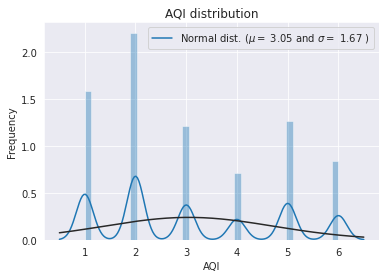

In [ ]:
# New addition
sns.distplot(y_train['AQI'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train['AQI'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AQI distribution')

#Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(y_train['AQI'], plot=plt)
plt.show()

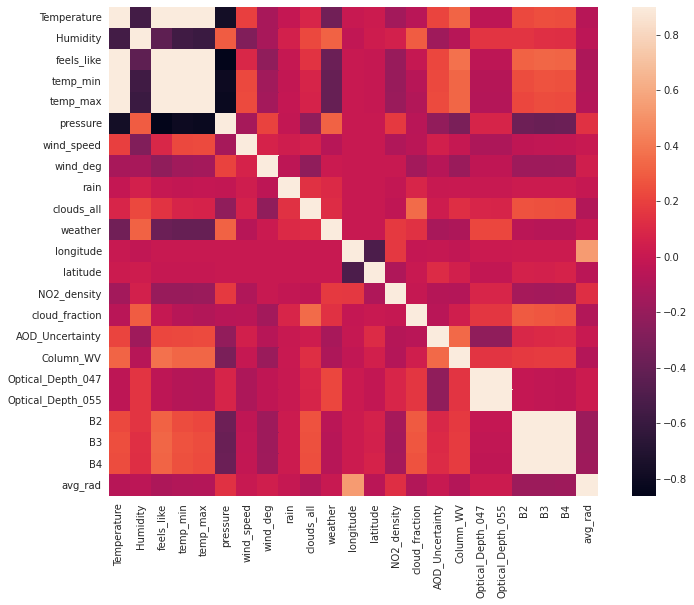

In [ ]:
#Correlation map to see how features are correlated
corrmat = pd.DataFrame(X_train, columns = num_cols).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
n_folds = 5

def acc_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.ravel())
    acc= np.sqrt(-cross_val_score(model, X_train.ravel(), y_train, scoring=["precision","recall"], cv = kf))
    return(acc)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train,'y_train':y_train,
                'X_test': X_test,'y_test':y_test}

In [ ]:
##RF Baseline
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=24,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['y_train'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.6s finished


RandomForestClassifier(random_state=24, verbose=1)

In [ ]:
predicted_labels = clf.predict(training_data['X_test'])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [ ]:
accuracy_score(training_data['y_test'], predicted_labels)


0.7052016524775752

In [ ]:
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy:  1.0
Test Accuraccy:  0.7052016524775752


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test,pred_test))

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.78      0.78      8801
           2       0.67      0.78      0.72     12539
           3       0.59      0.52      0.55      6666
           4       0.54      0.36      0.43      3968
           5       0.72      0.79      0.75      6907
           6       0.90      0.78      0.83      4932

    accuracy                           0.71     43813
   macro avg       0.70      0.67      0.68     43813
weighted avg       0.70      0.71      0.70     43813



In [ ]:
##takes forever to run

params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['y_train'])

In [ ]:
getTrainScores(gsearch1)


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['y_train'])
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['y_train'])
    # val = xgb.DMatrix(training_data['X_val'], label=training_data['y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = num_cols
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

In [ ]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=24)

Fitting model...
Fitting done!
[0]	train-mlogloss:2.09265	train-merror:0.542189
[100]	train-mlogloss:1.10019	train-merror:0.438355
[200]	train-mlogloss:1.00021	train-merror:0.389416
[299]	train-mlogloss:0.933533	train-merror:0.3565
-- Model Report --
XGBoost Accuracy: 0.6602150046789765
XGBoost F1-Score (Micro): 0.6602150046789765


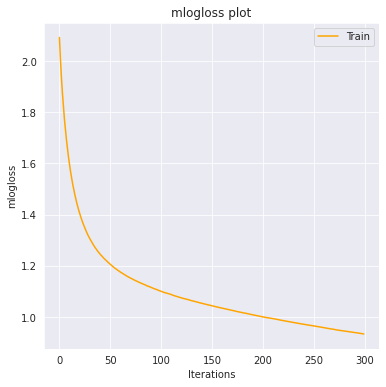

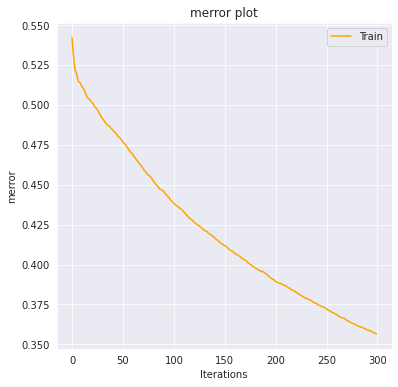

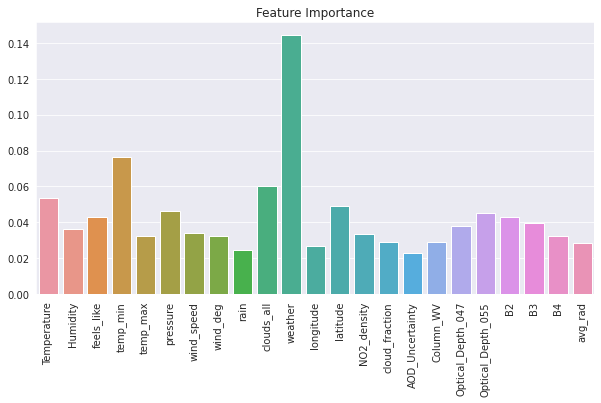

In [ ]:
fitXgb(xgb1, training_data)


In [ ]:
pred_test = xgb1.predict(X_test)
pred_train = xgb1.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test,pred_test))

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.74      0.74      8801
           2       0.61      0.76      0.67     12539
           3       0.55      0.41      0.47      6666
           4       0.53      0.25      0.34      3968
           5       0.65      0.79      0.71      6907
           6       0.89      0.75      0.81      4932

    accuracy                           0.66     43813
   macro avg       0.66      0.62      0.63     43813
weighted avg       0.66      0.66      0.65     43813



In [ ]:
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plot auc
ax[0].plot(x_axis, results['validation_0']['auc'], label='Train')
ax[0].plot(x_axis, results['validation_1']['auc'], label='Test')
ax[0].legend()
ax[0].set_title('XGBoost AUC-ROC')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_xlabel('N estimators')
# plot classification error
ax[1].plot(x_axis, results['validation_0']['error'], label='Train')
ax[1].plot(x_axis, results['validation_1']['error'], label='Test')
ax[1].legend()
ax[1].set_title('XGBoost Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show()
plt.tight_layout()

In [ ]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, y_train)

In [ ]:
##best parameters
getTrainScores(gsearch1)


In [ ]:
xgb2 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=6,
                    seed=27)



In [ ]:
fitXgb(xgb2, training_data)

In [ ]:
xgb3 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    reg_alpha=0.01,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=6,
                    seed=27)

fitXgb(xgb3, training_data)